# <center> Практические задания по цифровой обработке сигналов </center>
# <center> Первая лабораторная работа </center>


В данной работе Вы познакомитесь с основными методами работы с аудиоданными в Python. Разбересь в том, как работает свертка, и примените пару интересных фильтров.

# Задание 1. Работа с аудиофайлами в Python (1 балл)

## Теория

Звук - это аналоговый сигнал. То есть он является непрерывным по времени и по значениям. Для того, чтобы работать со звуком на цифровом устройстве, надо преобразовать его в цифровое представление. Для этого надо разделить непрерывный сигнал на промежутки времени (дискретизация сигнала) и разбить непрерывные значения на интервалы (квантование сигнала). Выбраные параметры дискретизации и квантования сигнала напрямую влияют на качество цифрового сигнала. 

<!-- 
## Практика

1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла? 

2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?   

3. Чем .wav отличается от других кодеков, например .mp3 или .ogg? -->


<!-- ### Подсказка

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib. -->

In [156]:
import matplotlib.pyplot as plt
from IPython.display import Audio
import numpy as np
import librosa
import soundfile
import numpy as np
import scipy
%matplotlib inline

### 1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла?

.wav использует стандартную RIFF-структуру, которая группирует содержимое файла из отдельных секций. Важно, что в файле как правило есть две секции: заголовок данных, где хранится информация о аудиофайле (размер, количество каналов, частота дискретизации) и сами данные.

Длина заголовка составляет 44 байта, байты с 24 по 27 отвечают за частоту дискретизации, с 34 по 35 - за "глубину звучания", т.е квантование. Наиболее удобным способом узнать эти характеристики является использование Python библиотек, к примеру, ниже используется библиотека soundfile.

In [157]:
import soundfile as sf

ob = sf.SoundFile('resources/train_whistle.wav')
print('Частота дискритезации: {}'.format(ob.samplerate))
print('Квантование: {} бит'.format(ob.subtype[-2:]))

Частота дискритезации: 8000
Квантование: 16 бит


### 2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?

**Подсказка**

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib.

Считаем файл с стандартной для librosa.load частотой дискритезации 22050 Гц, посмотрим на форму волны.

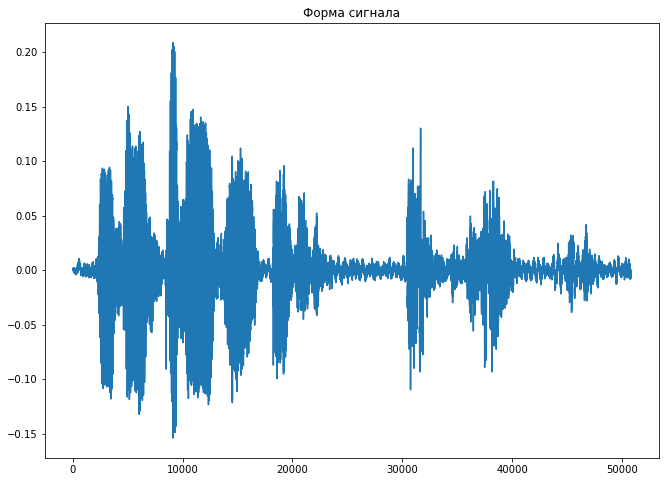

In [158]:
file_1, sr = librosa.load("voise.wav")
plt.figure(figsize=(11, 8))
plt.plot(file_1)
plt.title("Форма сигнала")
None

Воспроизведем сигнал. Все хорошо слышно.

In [159]:
Audio(data=file_1, rate= sr)

Попробуем поменять частоту дискритезации при помощи аргумента rate в IPython.Audio и послушать, что получится.

In [160]:
Audio(data=file_1, rate= 16000)

Очень отдаленно, но пока можно разобрать, что получается.

In [161]:
Audio(data=file_1, rate= 8000)

А здесь, на частоте 6 кГц, уже совсем непонятно, что было сказано.

In [162]:
Audio(data=file_1, rate= 6000)

### 3. Чем .wav отличается от других кодеков, например .mp3 или .ogg?

.wav формат не сжимает звуковые файлы, тогда как другие кодеки для уменьшения веса аудиофайла используют сжатие. Что касается конкретно .mp3 и .ogg - это сжатие с потерями, то есть при таком сжатии часть информации теряется, но для человеческого уха это не так заметно, в .wav потерь нет.

# Задание 2. Гармонические сигналы (1 балл)

## Теория
[Гармонические колебания](https://ru.wikipedia.org/wiki/Гармонические_колебания) -  колебания, при которых физическая величина изменяется с течением времени по гармоническому (синусоидальному/косинусоидальному) закону. 

В общем случае гармонические колебания задаются формулой:

$$y=A \cos(\omega t+\varphi_0)$$

где $А$ - это амплитуда, $\omega$ – циклическая частота (радиан/с), $\varphi$ - фаза (сдвиг), $t$ – время. 


In [163]:
# Сначала определим функцию для отрисовки сигнала с хорошим масштабом и сеткой
# Это поможет легче анализировать сигнал
def draw_signal(data, figsize=(14, 14)):
    plt.figure(figsize=figsize)
    plt.plot(data, linewidth=2)
    plt.minorticks_on()
    plt.xticks(np.arange(0, 1000, step=100))
    plt.yticks(np.arange((data.min().round())//10*10, 
                         (data.max().round())//10*10+10, step=5))
    plt.grid(which='major',
        color = 'k', 
        linewidth = 1)
    plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
    plt.show()

In [164]:
# Читаем данные с подготовленными сигналами
import pickle
with open("resources/data.pickle", "rb") as f:
    test_data = pickle.load(f)
# Теперь можно приступать к практике!

## Практика

Постройте графики трех сигналов a, b и c из test_data['task2']. Попробуйте подобрать коэффициенты для этих сигналов. Сгенерируйте сигналы (1000 отсчетов) с подобранными коэффициентами. Постройте графики сгенерированных сигналов и пройдите тест на схожесть с оригинальным.


Подсказка. Фаза, период и амплитуда сигнала - целочисленные. Для генерации пользуйтесь библиотекой numpy и функциями arange, sin, cos.

### Сигнал ***a***

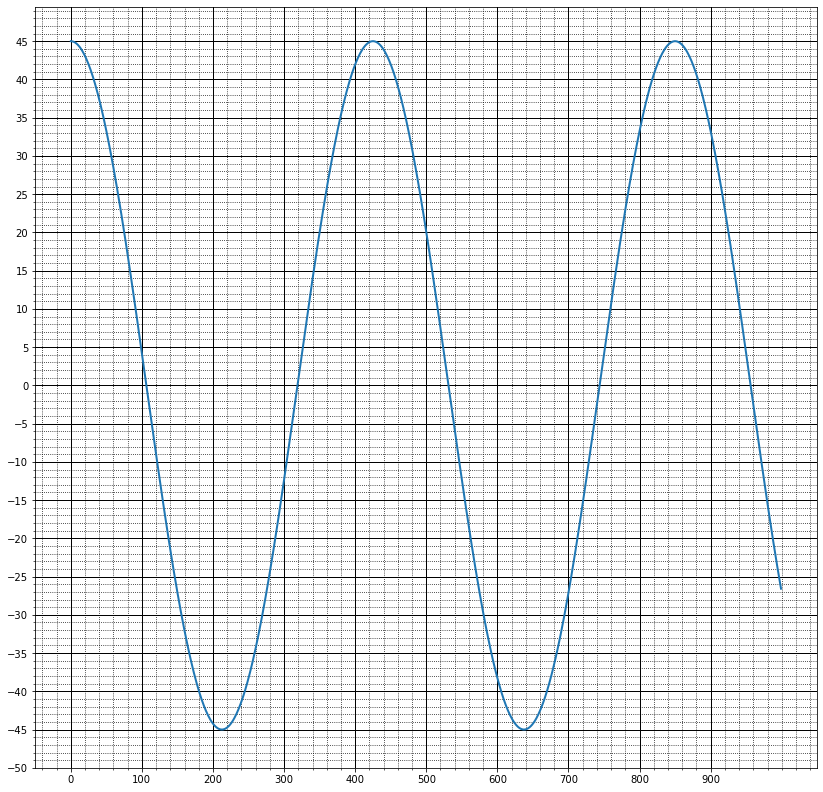

In [165]:
draw_signal(test_data['task2']['a'])

In [166]:
# YOUR CODE HERE
def generate_sig(A, T, phi=0, l=1000):
    omega=np.pi*2/T
    return A*np.cos(omega*np.arange(l)+phi)
a = generate_sig(45, 425)

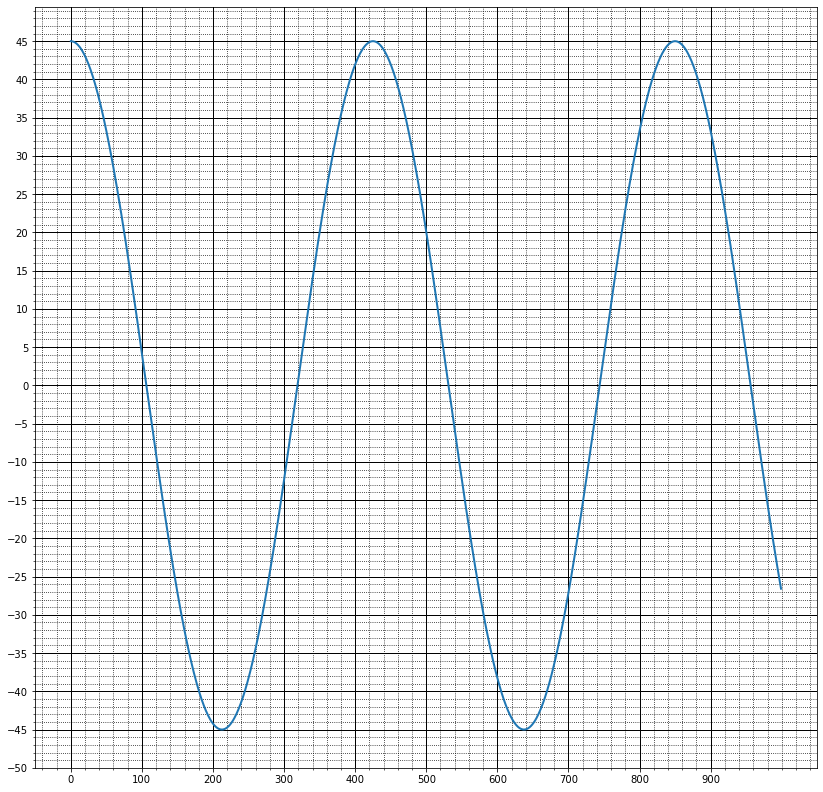

In [167]:
draw_signal(a)

In [168]:
assert len(a) == 1000
assert np.allclose(a, test_data["task2"]["a"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'a':**

1. Амплитуда - $A= 45$

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = \frac{2\pi}{425} \approx 0.015$

3. Фаза - $\phi= 0$

### Сигнал ***b***

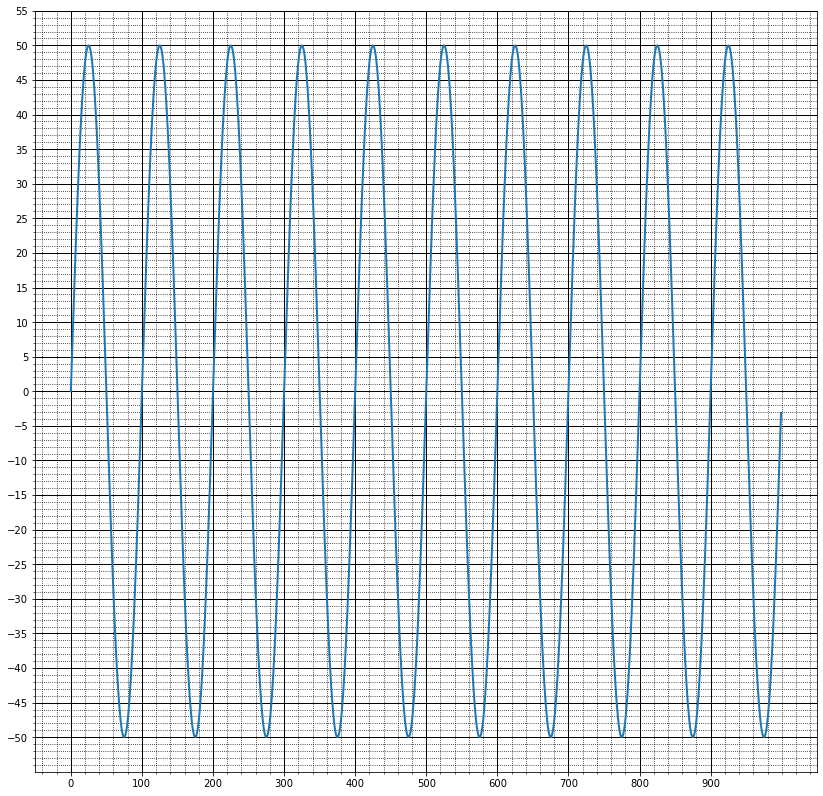

In [169]:
draw_signal(test_data['task2']['b'])

In [170]:
# YOUR CODE HERE
A = 50
omega = 2*np.pi/100
phi=0
b =  A*np.sin(omega*np.arange(1000)+phi)

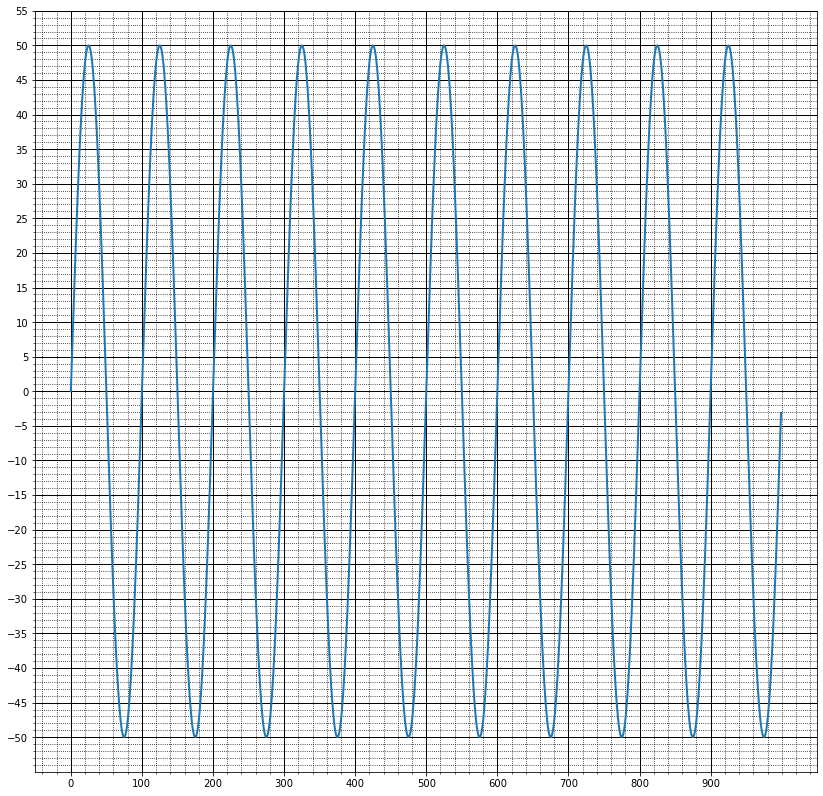

In [171]:
draw_signal(b)

In [150]:
assert len(b)== 1000
assert np.allclose(b, test_data["task2"]["b"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'b':**

1. Амплитуда - $A= 50$

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = \frac{2\pi}{100} \approx 0.063$

3. Фаза - $\phi= 0$ (если считаем, что сигнал синусоидальный, если рассматриваем как косинус, то $\pi/2$)

### Сигнал ***c***

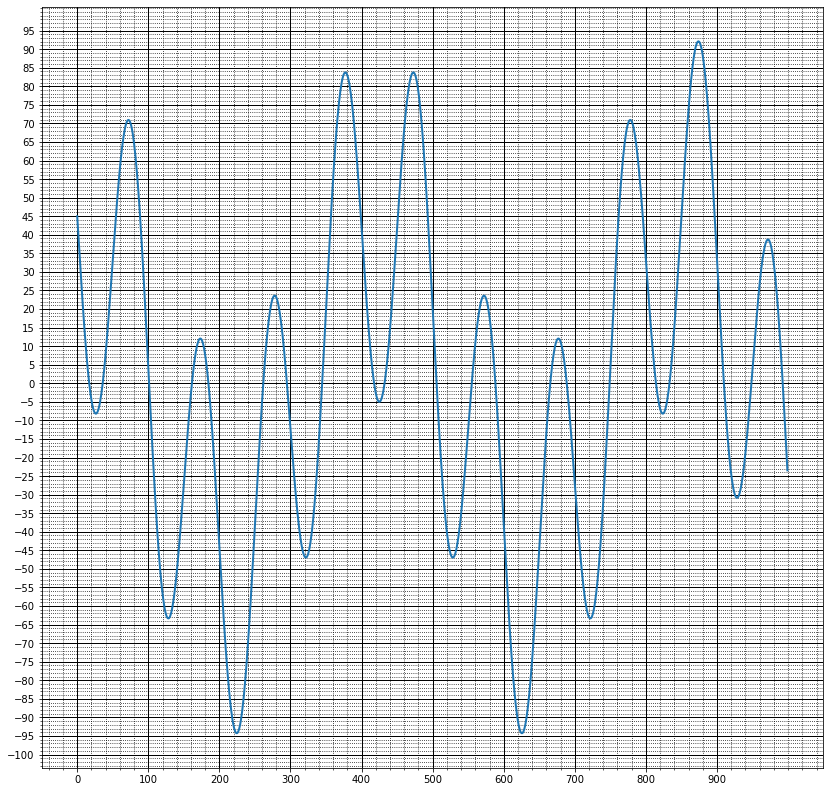

In [151]:
draw_signal(test_data['task2']['c'])

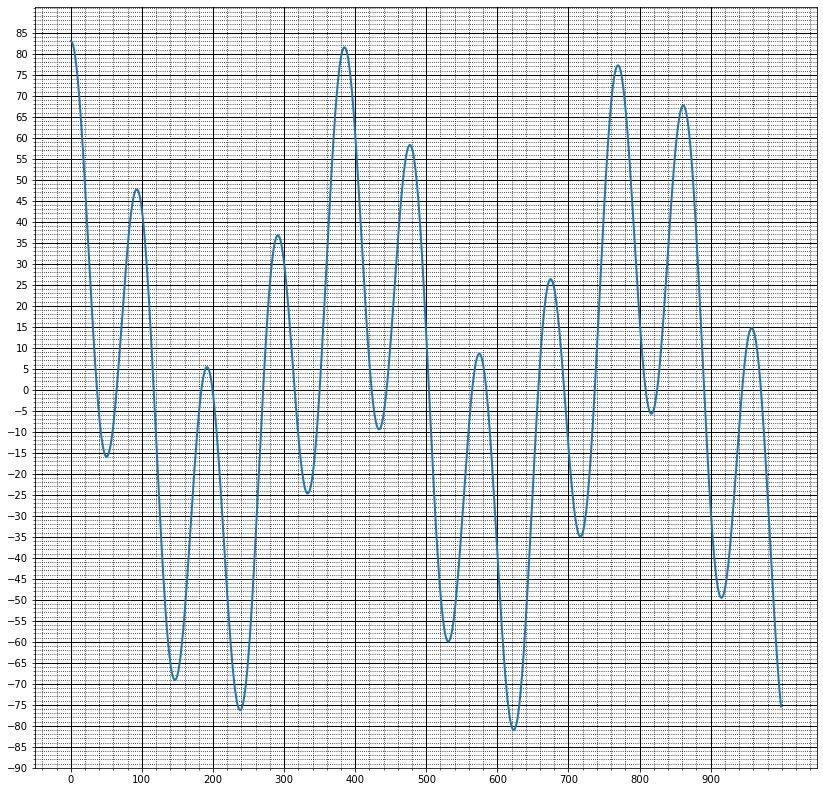

In [279]:
# сигнал состоит из двух гармоник
A, B = 39, 44
w1, w2 = 2*np.pi/402, 2*np.pi/96
phi1, phi2 = 0, 0

c = A * np.cos(w1 * np.arange(1000) + phi1) + B * np.cos(w2 * np.arange(1000) + phi2)
draw_signal(c)

In [280]:
assert len(c)== 1000
assert np.allclose(c, test_data["task2"]["c"], atol=1)
print("Ok!")

AssertionError: 

In [295]:
A, B = 39, 44
T1, T2 = 402, 96
w1, w2 = 2*np.pi/T1, 2*np.pi/T2
for phi1 in range(0, 400):
    for phi2 in range(0, 100):
        c = A * np.sin(w1 * np.arange(1000) + phi1) + B * np.cos(w2 * np.arange(1000) + phi2)
        try:
            assert np.allclose(c, test_data["task2"]["c"], atol=1)
            print(A, B, T1, T2, phi1, phi2)
        except AssertionError:
            pass

# Задание 3. Свертка (3 балла)

## Теория
Одна из наиболее частых операций, которая выполняется при обработке сигналов, это свёртка. Свёртка имеет много различных применений, например, с ее помощью можно убрать из сигнала шумы или применить к сигналу эффект эхо.


Свёртка — это математическая операция, применённая к двум функциям f и g и порождающая третью функцию. Операцию свёртки можно интерпретировать как «схожесть» одной функции с отражённой и сдвинутой копией другой.  Другими словами, преобразование свёртки однозначно определяет выходной сигнал y(t) для установленного значения входного сигнала x(t) при известном значении функции импульсного отклика системы h(t).

<!-- ![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution") -->
![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution")

Формула свёртки:
$$y_t=\frac{1}{2} \int_0^T x(\tau)h(t-τ)dτ$$
где $\tau$  - длительность импульсной переходной характеристики.

## Практика
Реализуйте операцию свёртки. Сравните её с существующей реализацией scipy.signal.convolve. Постройте графики фильтра, исходного сигнала и результата свертки.

In [257]:
def convolve(in1, in2):
    n1 = len(in1)
    n2 = len(in2)
    if n1 < n2: #cвертка коммутативна
        in1, in2 = in2, in1
        n1, n2 = n2, n1
    in2 = np.array(list(in2)+[0]*(n1-1))
    in1 = np.array([0]*(n2-1)+list(in1))
    h = [[in2[i-j] for i in range(n1+n2-1)] for j in range(n1+n2-1)]
    conv = h @ in1
    return conv

In [258]:
def test_convolve(a, b, print_debug=False):
    my_result = convolve(a, b)
    scipy_result = scipy.signal.convolve(a, b, method='direct')
    if print_debug:
        print(f"Your result {my_result}")
        print(f"Scipy result {scipy_result}")
    assert np.allclose(my_result, scipy_result), f"Test {a} conv {b} failed"
    print("Ok!")

In [259]:
a = np.repeat([0,1,0], 10)
b = np.array([0,1,2,3,2,1,0])

In [260]:
test_convolve(a, b, print_debug=True)

Your result [0 0 0 0 0 0 0 0 0 0 0 1 3 6 8 9 9 9 9 9 9 8 6 3 1 0 0 0 0 0 0 0 0 0 0 0]
Scipy result [0 0 0 0 0 0 0 0 0 0 0 1 3 6 8 9 9 9 9 9 9 8 6 3 1 0 0 0 0 0 0 0 0 0 0 0]
Ok!


### Нарисуйте результат свертки a и b

Сигнал **а**

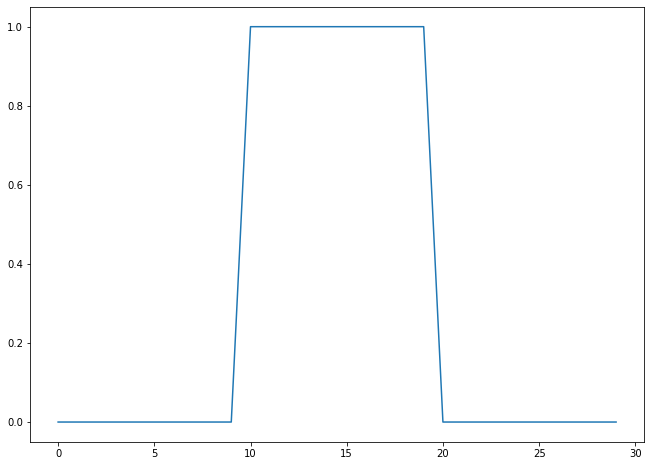

In [250]:
plt.figure(figsize=(11, 8))
plt.plot(a)
None

Сигнал **b**

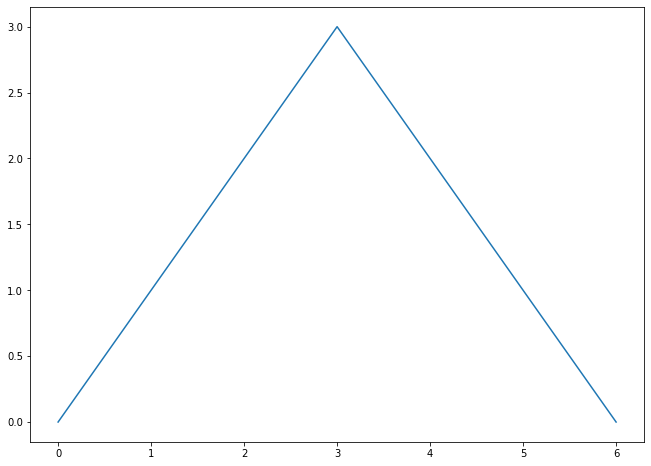

In [251]:
plt.figure(figsize=(11, 8))
plt.plot(b)
None

Свертка **a** и **b**

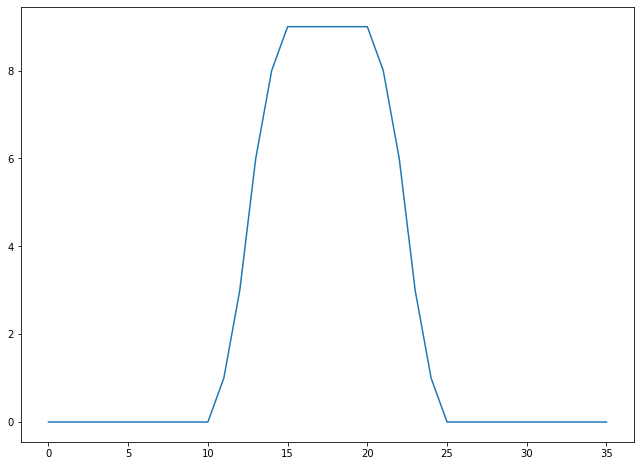

In [262]:
conv = convolve(a, b)
plt.figure(figsize=(11, 8))
plt.plot(conv)
None

Все 3 графика на одной картинке:

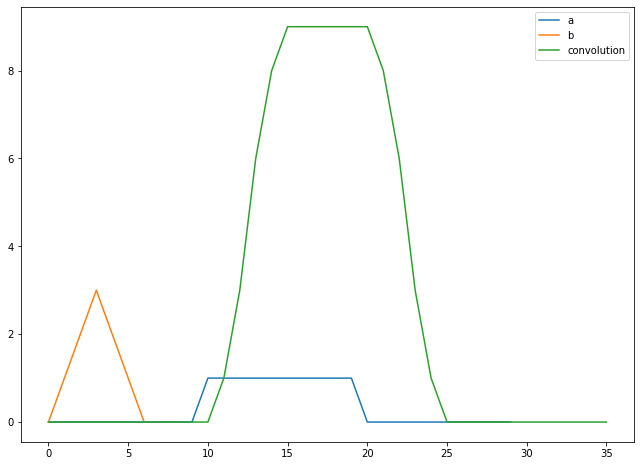

In [263]:
conv = convolve(a, b)
plt.figure(figsize=(11, 8))
plt.plot(a, label='a')
plt.plot(b, label='b')
plt.plot(conv, label='convolution')
plt.legend()
None

# Задание 4. * Алгоритм Карплуса-Стронга 

Реализуйте  [Алгоритм Карплуса-Стронга](https://en.wikipedia.org/wiki/Karplus%E2%80%93Strong_string_synthesis). В качестве фильтра используйте усреднитель двух смежных отсчетов. Проверьте результат. 

Отрисуйте и воспроизведите полученный сигнал. На что влияют параметры генерации? Попробуйте имитировать звучание разных струн гитары.

In [264]:
def karplus_strong(noise, N):
    # Noise - input
    # N - number of samples to generate
    # return y - generated signal based on Noise 
    # YOUR CODE HERE

   

    raise NotImplementedError()

In [265]:
np.random.seed(seed=1)
sample_rate = 44100 
frequency = 82.41
sec = 2
gen_len = sample_rate * sec
noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency))) # [-1, 1]

gen_wav = karplus_strong(noise, gen_len)
assert np.allclose(gen_wav[:len(noise)], noise), "Generated signal must starting with noise"
assert np.allclose(gen_wav[len(noise)], (noise[0])/2), "Out of range samples eq 0."
assert np.allclose(gen_wav[len(noise)+1: 2*len(noise)], (noise[:-1] + noise[1:])/2), \
    "Bad requrent rule( 1 iteration)"
assert np.allclose(gen_wav[2*len(noise)], (noise[0]/2 + noise[-1])/2), \
    "Bad requrent rule( 2 iteration)"
assert np.allclose(gen_wav[2*len(noise)+2: 3*len(noise)], \
                   (((noise[:-1] + noise[1:])/2)[:-1] + ((noise[:-1] + noise[1:])/2)[1:])/2), \
    "Bad requrent rule( 3 iteration)"
print('All Ok!')

NotImplementedError: 

### Попробуем покрутить параметры генерации

Сгенерируем гитарные ноты:

In [266]:
# YOUR CODE HERE

Визуализируем затухание амплитуды:

NameError: name 'gen_wav' is not defined

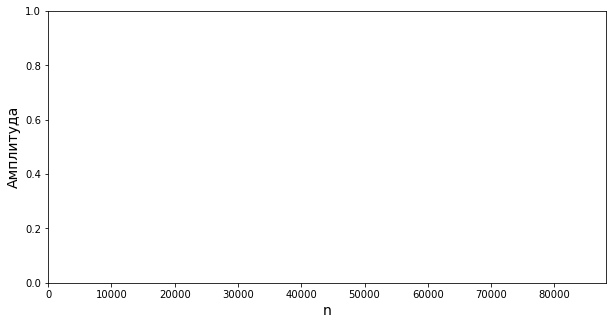

In [267]:
plt.figure(figsize=(10,5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.xlim(0, gen_len)
plt.plot(np.linspace(0, gen_len+1, gen_len), gen_wav)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()

Визуализируйте затухание амплитуд гитарных нот:

In [ ]:
# YOUR CODE HERE